https://www.datacamp.com/tutorial/sarsa-reinforcement-learning-algorithm-in-python

In [1]:
# pip install -r requirements.txt
# !AutoROM --accept-license

In [2]:
import gymnasium         as gym
import matplotlib.pyplot as plt
import numpy             as np
from moviepy import ImageSequenceClip

In [3]:
# Create the Taxi environment
env = gym.make("Taxi-v3", render_mode="rgb_array")

In [4]:
# initialize Q-table
n_states  = env.observation_space.n
n_actions = env.action_space.n
Q_table   = np.zeros((n_states, n_actions))

In [5]:
# SARSA hyperparameters
alpha      = 0.1  # learning rate
gamma      = 0.99 # fiscount factor
epsilon    = 0.1  # exploration rate for epsilon-greedy policy
n_episodes = 20000

In [6]:
# lists to store performance metrics
episode_rewards = []
episode_lengths = []

In [7]:
# policy for taking an action 
def epsilon_greedy(state, epsilon):
   if np.random.random() < epsilon:
       # take random action - explore
       return env.action_space.sample()
   else:
       # take action with the highest Q-value - exploit
       return np.argmax(Q_table[state])

![image](https://media.datacamp.com/cms/google/ad_4nxdpsluhcy2zqmeihc-f5aoapehgrdbgwr8w0o3geycifavtxei3t3ln-1z88hjvyevu8keg4uwjbgmuhrgdifidbkrtkdlumxrvks1nnmtu9q8hpjuunsbqmgq7smx0qvpm3tmdy7-yvnvkjs9auqdqbdw-.png)  

In [8]:
# SARSA training loop
for episode in range(n_episodes):
    state, _     = env.reset()                     # initial state
    action       = epsilon_greedy(state, epsilon)  # first action
    done         = False
    total_reward = 0
    steps        = 0
    while not done:
        next_state, reward, terminated, truncated, _ = env.step(action) # reward, state
        done = terminated or truncated # if either are true, episode is done
        next_action = epsilon_greedy(next_state, epsilon)               # action
        # Q update equation implementation - see equation above
        Q_table[state, action] += alpha * (
            reward + gamma * Q_table[next_state, next_action] - Q_table[state, action]
        )
        state  = next_state
        action = next_action
        total_reward += reward
        steps        += 1
    # when episode is done, record total reward and episode length
    episode_rewards.append(total_reward)
    episode_lengths.append(steps)
    # printout every 2000 episodes
    if episode % 2000 == 0:
        avg_reward = np.mean(episode_rewards[-1000:])
        avg_length = np.mean(episode_lengths[-1000:])
        print(f"Episode {episode}, Avg Reward: {avg_reward:.2f}, Avg Length: {avg_length:.2f}")

Episode 0, Avg Reward: -713.00, Avg Length: 200.00
Episode 2000, Avg Reward: -5.08, Avg Length: 19.46
Episode 4000, Avg Reward: 2.14, Avg Length: 14.86
Episode 6000, Avg Reward: 2.14, Avg Length: 14.79
Episode 8000, Avg Reward: 2.30, Avg Length: 14.90
Episode 10000, Avg Reward: 2.27, Avg Length: 14.65
Episode 12000, Avg Reward: 2.21, Avg Length: 15.01
Episode 14000, Avg Reward: 2.34, Avg Length: 14.81
Episode 16000, Avg Reward: 2.17, Avg Length: 14.80
Episode 18000, Avg Reward: 2.27, Avg Length: 14.80


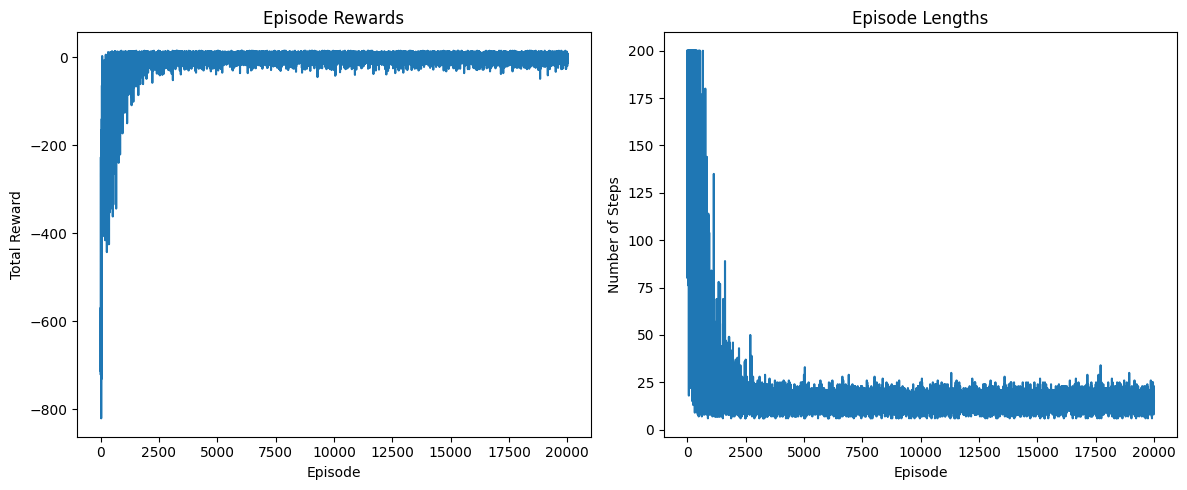

In [9]:
# plot the learning curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.subplot(1, 2, 2)
plt.plot(episode_lengths)
plt.title("Episode Lengths")
plt.xlabel("Episode")
plt.ylabel("Number of Steps")
plt.tight_layout()
plt.show()